## Wilcoxon Rank-Sum Test (Mann-Whitney U Test)

The Rank-Sum test is a nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample.

It is often described as the non-parametric version of the two-sample t-test. 

Unlike the t-test it does not require the assumption of normal distributions. It is nearly as efficient as the t-test on normal distributions.

Whereas the null hypothesis of the two-sample t test is equal means, the null hypothesis of the Wilcoxon test is usually taken as equal medians. Another way to think of the null is that the two populations have the same distribution with the same median. If we reject the null, that means we have evidence that one distribution is shifted to the left or right of the other. Since we’re assuming our distributions are equal, rejecting the null means we have evidence that the medians of the two populations differ.

First, let’s recall the assumptions of the two-sample t test for comparing two population means:

1. The two samples are independent of one another
2. The two populations have equal variance or spread
3. The two populations are normally distributed

There’s no getting around #1. That assumption must be satisfied for a two-sample t-test. When assumptions #2 and #3 (equal variance and normality) are not satisfied but the samples are large (say, greater than 30), the results are approximately correct. But when our samples are small and our data skew or non-normal, we probably shouldn’t place much faith in the two-sample t-test.

This is where the Wilcoxon Rank Sum Test comes in. It only makes the first two assumptions of independence and equal variance. It does not assume our data have have a known distribution. Known distributions are described with math formulas. These formulas have parameters that dictate the shape and/or location of the distribution. For example, variance and mean are the two parameters of the Normal distribution that dictate its shape and location, respectively. Since the Wilcoxon Rank Sum Test does not assume known distributions, it does not deal with parameters, and therefore we call it a non-parametric test.

References:   
[University of Virginia Library Research Data Services](https://data.library.virginia.edu/the-wilcoxon-rank-sum-test/)  
[Wikipedia](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test)






### How does it work?

It calculates a p value for the U statistic.

The U statistic corresponds to the number of wins out of all pairwise contests (see the tortoise and hare example under Examples below). For each observation in one set, count the number of times this first value wins over any observations in the other set (the other value loses if this first is larger). Count 0.5 for any ties. The sum of wins and ties is U for the first set. U for the other set is the converse.

It could be calculated with something like:

    u = 0
    for i in first_array:
        wins = (i > second_array).sum()
        ties = (i == second_array).sum()
        u += wins + 0.5 * ties
        
Next a z value needs to be calculated for this:

$$ z = \frac{u\_statistic - u\_mean}{\sigma_U}$$

The u parmaeter in this case is the expected mean calculated by getting a u value with exactly 50% wins:

$$ u\_mean = \frac{n_{first\_array} + n_{second\_array}}{2}$$

The distribution of the U is approximately normal with a standard deviation of: 

$$ \sigma_U = \sqrt{\frac{n_1n_2(n_1+n_2+1)}{12}}$$

After getting the z score, a p score can be calculated.

*Note: The actual implementation used is typically a wee bit more complex (see [Wikipedia](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test)). However the above worked through explanation works for smaller sample sizes and gives a good intuitive feel for what it is doing.*

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('./data/permutation_data.csv')
data.head()

,condition,time
0,0,5940
1,0,666
2,1,571
3,1,779
4,0,1928


In [10]:
control_data = data[data['condition'] == 0]['time']
experimental_data = data[data['condition'] == 1]['time']

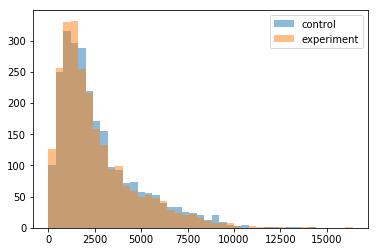

In [11]:
# data visualization
bin_borders = np.arange(0, data['time'].max()+400, 400)
plt.hist(control_data, alpha = 0.5, bins = bin_borders)
plt.hist(experimental_data, alpha = 0.5, bins = bin_borders)
plt.legend(labels = ['control', 'experiment']);

In [15]:
stats.mannwhitneyu(control_data, experimental_data, alternative='greater')

MannwhitneyuResult(statistic=3273546.0, pvalue=0.001752280226004597)

*We can reject the null hypothesis as our p value is less than an $\alpha$ of 0.05* 